In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
display(df.describe())

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.shape

(301, 9)

In [9]:
df.duplicated().any()

True

In [10]:
duplicate_values = df.duplicated().sum()
duplicate_values

2

In [11]:
null_values = df.isna().sum()
null_values

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [12]:
df.drop_duplicates(inplace= True)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

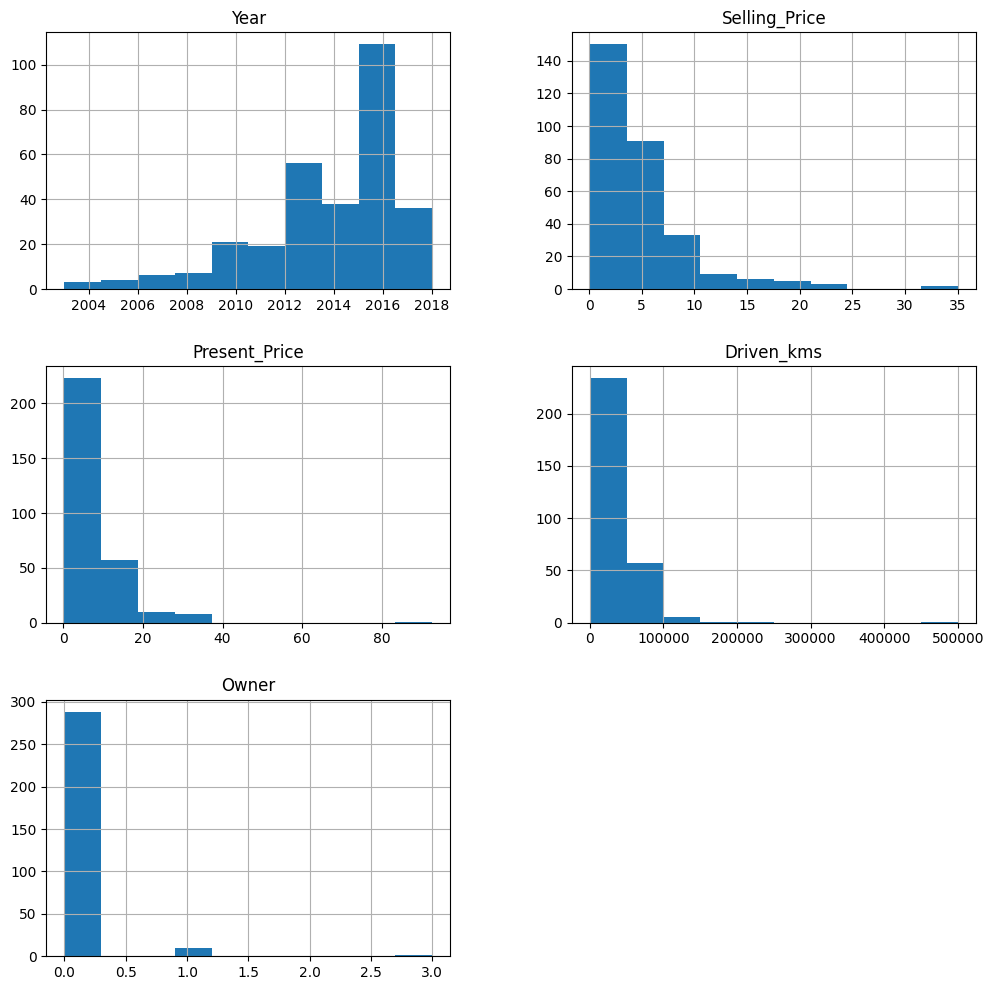

In [13]:
df.hist(figsize  = (12,12))

In [14]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

numerical_df = df[numerical_columns]

corr_matrix = numerical_df.corr()

In [15]:
corr_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


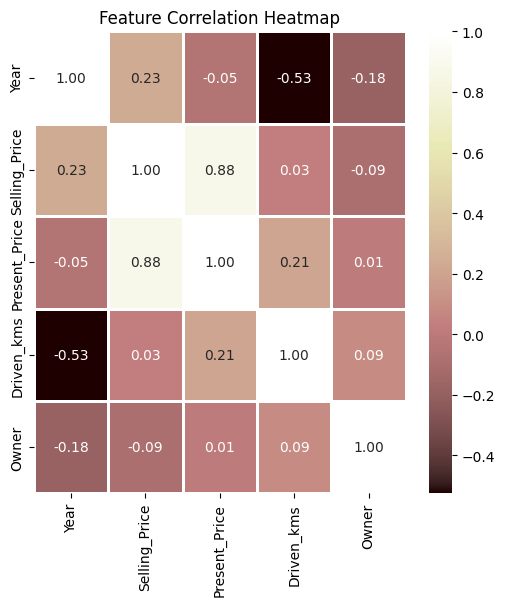

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='pink',  linewidths=1,fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

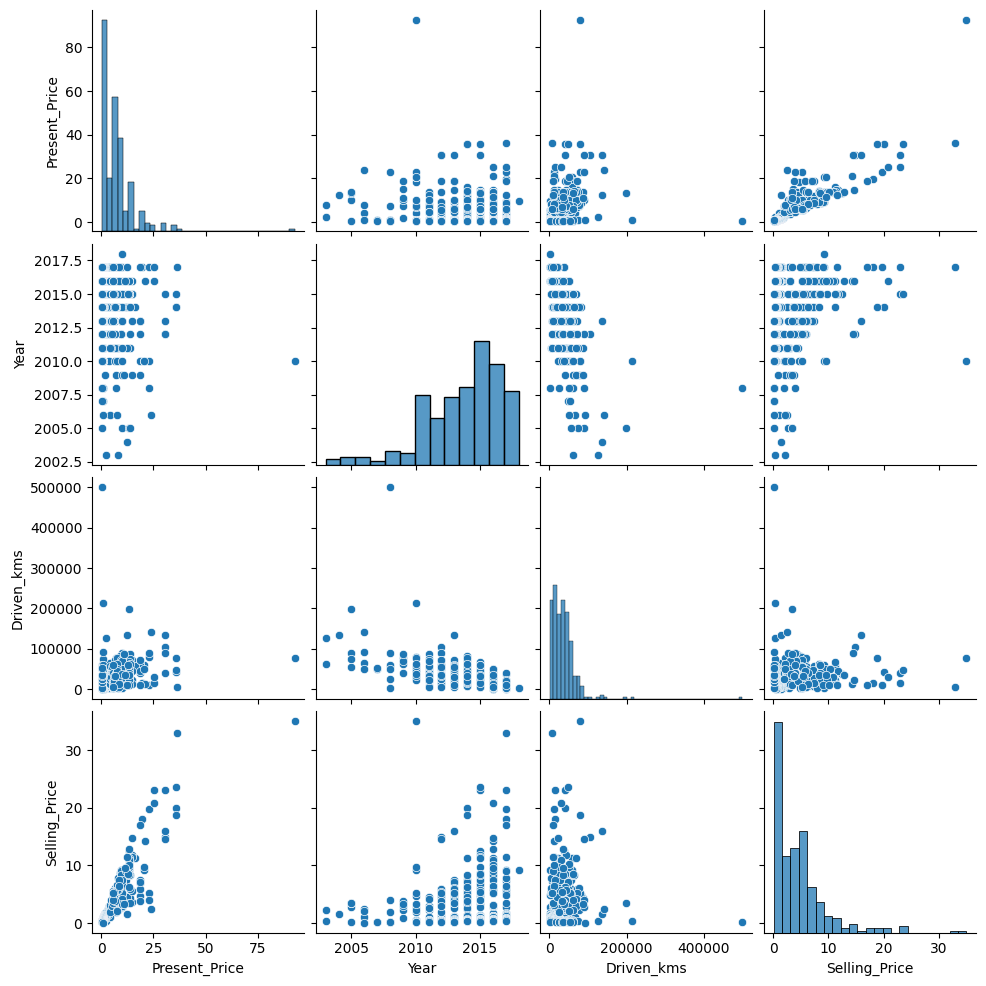

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(df[['Present_Price', 'Year', 'Driven_kms', 'Selling_Price']])
plt.show()

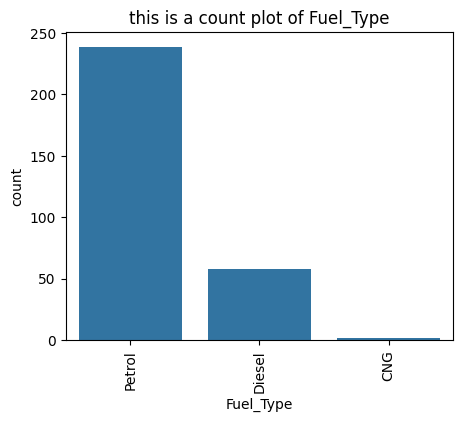

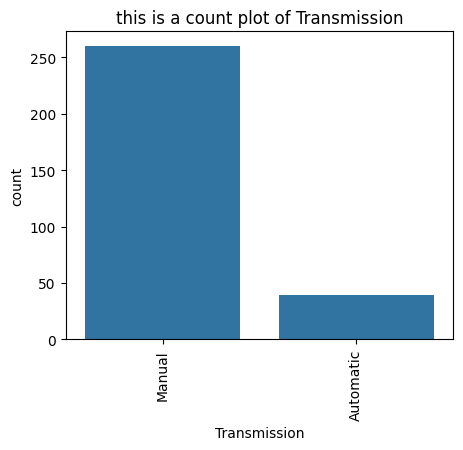

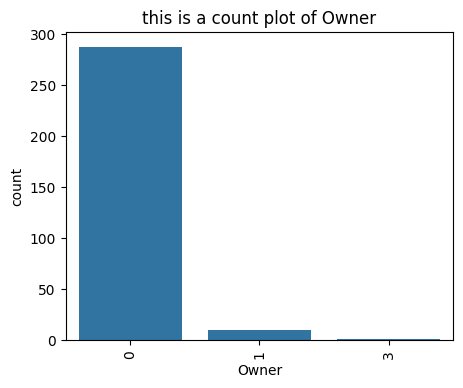

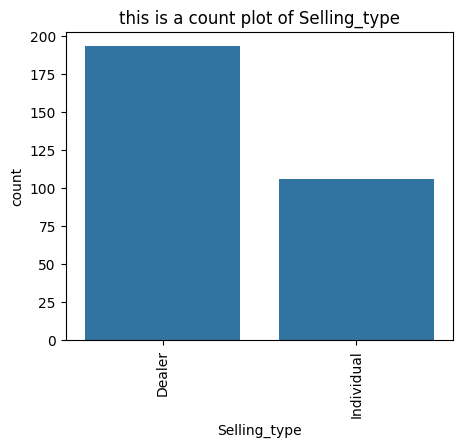

In [18]:
columns = ['Fuel_Type', 'Transmission', 'Owner', 'Selling_type']

for column in columns:
    plt.figure(figsize = (5,4))
    sns.countplot(x = column, data = df)
    plt.title(f'this is a count plot of {column}')
    plt.xticks(rotation=90)
    plt.show()

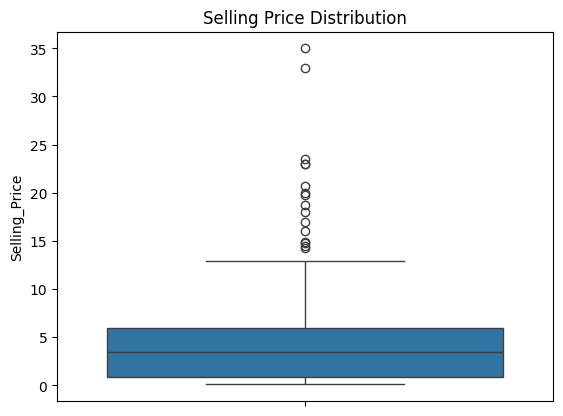

In [19]:
sns.boxplot(df['Selling_Price'])
plt.title('Selling Price Distribution')
plt.show()

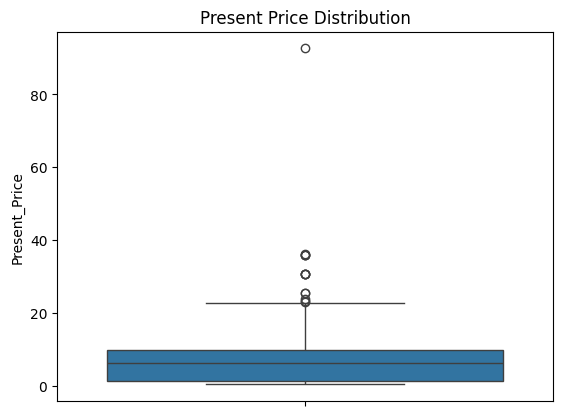

In [20]:
sns.boxplot(df['Present_Price'])
plt.title('Present Price Distribution')
plt.show()

In [21]:
df['Car_Age'] = 2024 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [22]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64
Car_Age,int64


In [23]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,58
CNG,2


In [24]:
df['Selling_type'].value_counts()

,count
Selling_type,
Dealer,193
Individual,106


In [25]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,260
Automatic,39


In [26]:
ordinal_map = {'CNG':2,'Diesel':1,'Petrol':0}
df['Fuel_Type'] = df['Fuel_Type'].map(ordinal_map)
df['Fuel_Type'] = df['Fuel_Type'].astype('int64')

In [27]:
df = pd.get_dummies(df, columns = ['Selling_type','Transmission'])

In [28]:
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,int64
Owner,int64
Car_Age,int64
Selling_type_Dealer,bool
Selling_type_Individual,bool


In [29]:
bool_columns = ['Selling_type_Dealer','Selling_type_Individual', 'Transmission_Automatic', 'Transmission_Manual']

df[bool_columns] = df[bool_columns].astype('int64')

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Owner,Car_Age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,10,1,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,11,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,7,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,13,1,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,10,1,0,0,1


In [31]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [32]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Owner,Car_Age,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,10,1,0,0,1
1,2013,9.54,43000,1,0,11,1,0,0,1
2,2017,9.85,6900,0,0,7,1,0,0,1
3,2011,4.15,5200,0,0,13,1,0,0,1
4,2014,6.87,42450,1,0,10,1,0,0,1


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [35]:
def evaluation(y, predictions):
    return {
        'MAE': mean_absolute_error(y, predictions),
        'MSE': mean_squared_error(y, predictions),
        'RMSE': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

In [36]:
from sklearn.linear_model import LinearRegression

model_name = "LinearRegression"


lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


predictions = lin_reg.predict(X_test)

evaluation_results_l = evaluation(y_test, predictions)

evaluation_results_l["Model"] = model_name


models = pd.DataFrame([evaluation_results_l])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_l.items():
    print(f"{metric}: {value}")

Evaluation Results for LinearRegression
------------------------------
MAE: 1.5408119549692953
MSE: 6.675444100492594
RMSE: 2.583688081114397
R-squared: 0.740993435641341
Model: LinearRegression


In [37]:
from sklearn.ensemble import RandomForestRegressor

model_name = "RandomForest"


rand_for = RandomForestRegressor(n_estimators=100, random_state=0)

rand_for.fit(X_train, y_train)


predictions = rand_for.predict(X_test)


evaluation_results_r = evaluation(y_test, predictions)


evaluation_results_r["Model"] = model_name


models = pd.DataFrame([evaluation_results_r])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_r.items():
    print(f"{metric}: {value}")

Evaluation Results for RandomForest
------------------------------
MAE: 1.4862266666666675
MSE: 12.184563868000009
RMSE: 3.4906394640523977
R-squared: 0.5272401389105399
Model: RandomForest


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

model_name = "GradientBoostingRegressor"


g_boost = GradientBoostingRegressor(random_state=0)


g_boost.fit(X_train, y_train)


predictions = g_boost.predict(X_test)


evaluation_results_g = evaluation(y_test, predictions)

evaluation_results_g["Model"] = model_name

models = pd.DataFrame([evaluation_results_g])

print("Evaluation Results for", model_name)
print('-'*30)
for metric, value in evaluation_results_g.items():
    print(f"{metric}: {value}")

Evaluation Results for GradientBoostingRegressor
------------------------------
MAE: 1.2702059117088647
MSE: 8.984301881463482
RMSE: 2.9973825050305947
R-squared: 0.6514099843473817
Model: GradientBoostingRegressor


In [39]:
model_results = [
    {"model": "LinearRegression", "r2 score": evaluation_results_l['R-squared']},
    {"model": "RandomForestRegressor", "r2 score": evaluation_results_r['R-squared']},
    {"model": "XGBRegressor", "r2 score": evaluation_results_g['R-squared']},
]

In [40]:
sorted_results = sorted(model_results, key=lambda x: x["r2 score"])


for result in sorted_results:
    print(result)

{'model': 'RandomForestRegressor', 'r2 score': 0.5272401389105399}
{'model': 'XGBRegressor', 'r2 score': 0.6514099843473817}
{'model': 'LinearRegression', 'r2 score': 0.740993435641341}


In [41]:
model_names = [model["model"] for model in model_results]
rmse_values = [model["r2 score"] for model in model_results]

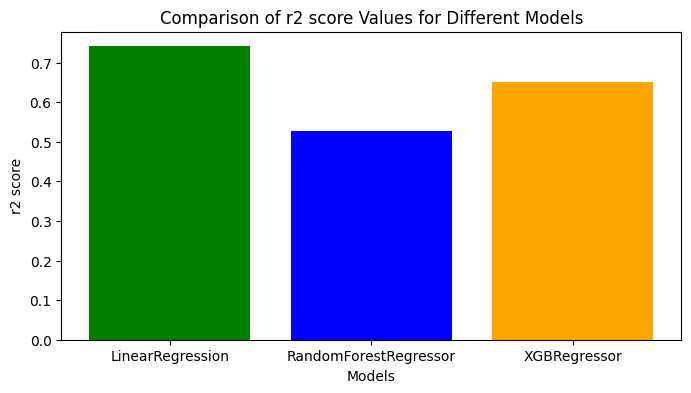

In [42]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, rmse_values, color=['green', 'blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('r2 score')
plt.title('Comparison of r2 score Values for Different Models')
plt.show()